In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,-1].values

In [5]:
x.shape

(400, 2)

In [6]:
y.shape

(400,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=27)

In [9]:
x_train.shape

(320, 2)

In [10]:
x_test.shape

(80, 2)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=8)

In [13]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [14]:
pred_1 = model1.predict(x_test)
pred_2 = model2.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print("Model1 :",classification_report(y_test,pred_1))

Model1 :               precision    recall  f1-score   support

           0       0.68      1.00      0.81        54
           1       0.00      0.00      0.00        26

    accuracy                           0.68        80
   macro avg       0.34      0.50      0.40        80
weighted avg       0.46      0.68      0.54        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print("Model2 :",classification_report(y_test,pred_2))

Model2 :               precision    recall  f1-score   support

           0       0.79      0.91      0.84        54
           1       0.72      0.50      0.59        26

    accuracy                           0.78        80
   macro avg       0.76      0.70      0.72        80
weighted avg       0.77      0.78      0.76        80



In [18]:
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [19]:
from sklearn.metrics import roc_curve
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
auc_score_1 = roc_auc_score(y_test,pred_prob1[:,1])
auc_score_2 = roc_auc_score(y_test,pred_prob2[:,1])

In [22]:
auc_score_1

0.3824786324786325

In [23]:
auc_score_2

0.8315527065527066

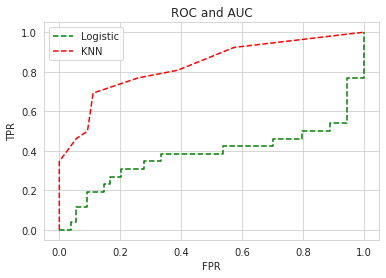

In [24]:
plt.plot(fpr1,tpr1,ls='--',color='green',label="Logistic")
plt.plot(fpr2,tpr2,ls='--',color='red',label='KNN')
plt.title('ROC and AUC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)
plt.show()